In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_test = pd.read_csv('SalaryData_Train.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df_test.shape

(30161, 14)

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
df_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

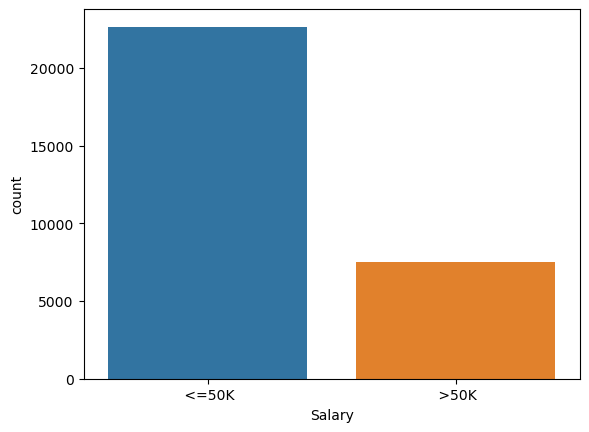

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [7]:
sns.countplot(x='Salary',data= df_test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
df_test['Salary'].value_counts()

In [8]:
list[df_test]
df_test.shape

(30161, 14)

In [9]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [10]:
for i in range(0,14):
    df_test.iloc[:,i] = LE.fit_transform(df_test.iloc[:,i])

In [11]:
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [12]:
Y = df_test['Salary']
X = df_test.iloc[:,:13]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=50)

In [14]:
from sklearn.svm import SVC
clf1 = SVC(kernel='linear',C=2)

In [ ]:
clf1.fit(X_train, Y_train)
y_pred_train = clf1.predict(X_train)
y_pred_test = clf1.predict(X_test)

In [ ]:
from sklearn import metrics
print("Training Accuracy :",metrics.accuracy_score(Y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, y_pred_test).round(2))

In [ ]:
clf2 = SVC(kernel='poly',degree=2)

In [ ]:
clf2.fit(X_train, Y_train)
y_pred_train = clf2.predict(X_train)
y_pred_test  = clf2.predict(X_test)

In [ ]:
print("Training Accuracy :",metrics.accuracy_score(Y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, y_pred_test).round(2))

In [ ]:
clf3 = SVC(kernel='rbf',gamma = 5.5)

In [ ]:
clf3.fit(X_train, Y_train)
y_pred_train = clf3.predict(X_train)
y_pred_test = clf3.predict(X_test)

In [ ]:
print("Training Accuracy :",metrics.accuracy_score(Y_train, y_pred_train).round(2))
print("Testing Accuracy:",metrics.accuracy_score(Y_test, y_pred_test).round(2))